<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas_datareader import data

In [2]:
# Google Financeがサービス終了したため、Stooqから取得
# Google上場時の株価は取得できなかった
df = data.DataReader('GOOG.US', start='2008', end='2020', data_source='stooq')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,1330.11,1338.00,1329.09,1337.02,962468
2019-12-30,1350.00,1353.00,1334.02,1336.14,1051323
2019-12-27,1362.99,1364.53,1349.31,1351.89,1038718
2019-12-26,1346.17,1361.33,1344.47,1360.40,667754
2019-12-24,1348.50,1350.26,1342.78,1343.56,347518


In [3]:
# 解析しやすいように終値だけにする
goog = df['Close']

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

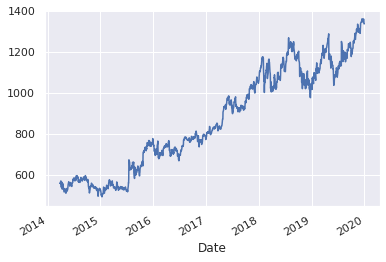

In [ ]:
# 2014年以前のデータは取得できなかった
goog.plot()

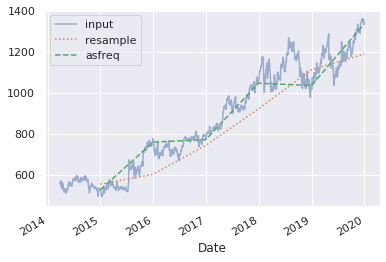

In [ ]:
# 再サンプリング
goog.plot(alpha=0.5, style='-')
# データ集約
# 前年の平均をプロット
goog.sort_index().resample('BA').mean().plot(style=':')
# データ選択
# 年末の値をプロット
# sort_index()なしだと空のSeriesを返す
goog.sort_index().asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

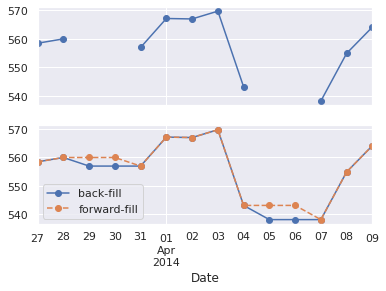

In [5]:
# 再サンプリングの際に欠損値はdefaultでは空のまま(NA)としている
# 穴埋めの方法として、前方穴埋めと後方穴埋めがある
# 穴埋めによる影響を可視化する
fig, ax = plt.subplots(2, sharex=True)
data = goog.sort_index().iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  # This is added back by InteractiveShellApp.init_path()


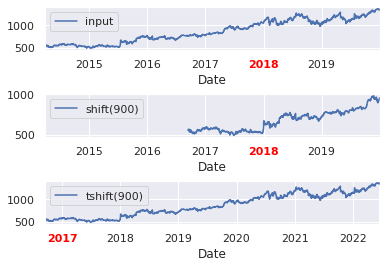

In [6]:
# 時間シフト
fig, ax = plt.subplots(3, sharex=False)
plt.subplots_adjust(hspace=1)
# データに頻度を適用する
goog = goog.sort_index().asfreq('D', method='pad')

goog.plot(ax=ax[0])
# シフト量は頻度の倍数
# 900日分シフト
# shift()はindexはそのままで、グラフを指定オフセット分ずらす。そのため、グラフの表示範囲は変わらず空白のデータができる
goog.shift(900).plot(ax=ax[1])
# tshift()はindexごとデータをずらす。そのため、時系列の表示範囲もずれる。
goog.tshift(900).plot(ax=ax[2])

# local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
# ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


Text(0, 0.5, '% Return on Investment')

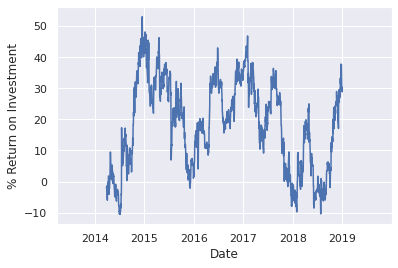

In [ ]:
# 1年間の投資収益率(ROI)を計算
# 1年後ろにずらすことで、1年前の株価と1年後の株価のindexを一致させる
# 増益分のみを計算したいため、1を引く
ROI = 100 * (goog.tshift(-365) / goog -1)
ROI.plot()
plt.ylabel('% Return on Investment')

tshift()はdeprecatedするため、shift()のみで同様の処理を行う

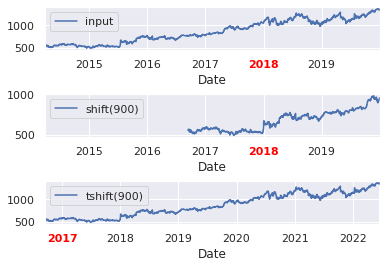

In [13]:
fig, ax = plt.subplots(3, sharex=False)
plt.subplots_adjust(hspace=1)

goog.plot(ax=ax[0])
# シフト量は頻度の倍数
# 900日分シフト
# shift()はindexはそのままで、グラフを指定オフセット分ずらす。そのため、グラフの表示範囲は変わらず空白のデータができる
goog.shift(900).plot(ax=ax[1])
# tshift()はindexごとデータをずらす。そのため、時系列の表示範囲もずれる。
tshift_goog = goog.copy()
tshift_goog.index = goog.index.shift(900)
tshift_goog.plot(ax=ax[2])

# local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
# ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')

Text(0, 0.5, '% Return on Investment')

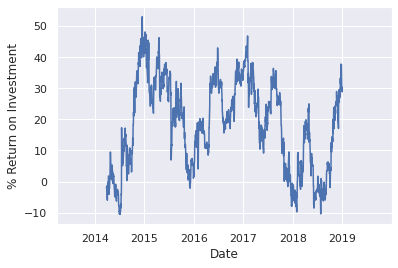

In [16]:
# ROI
# 1年後ろにずらすことで、1年前の株価と1年後の株価のindexを一致させる
# 増益分のみを計算したいため、1を差し引く(1を引かなければ、株価が1.5倍~になったというように表現させる)
tshift_goog = goog.copy()
tshift_goog.index = goog.index.shift(-365)

ROI = 100 * (tshift_goog / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment')

2014年から2019年までの間で、最も収益性が高かったのは2015年ということが分かる

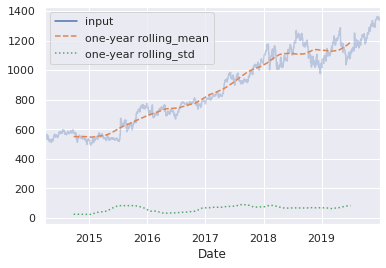

In [17]:
# 1年間の株価の移動平均と移動標準偏差
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({ 'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std() })
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)